In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers,Sequential

In [3]:
data_dir = './data'

In [4]:
train_data = ImageDataGenerator(rescale=1./1.25, validation_split=0.25)
validation_data = ImageDataGenerator(rescale=1./1.25, validation_split=0.25)

In [5]:
train_gen = train_data.flow_from_directory(
    data_dir,
    target_size =(224,224),
    batch_size = 32,
    class_mode = 'binary',
    subset='training'
)

Found 380 images belonging to 2 classes.


In [6]:
validation_gen = validation_data.flow_from_directory(
    data_dir,
    target_size =(224,224),
    batch_size = 32,
    class_mode = 'binary',
    subset='validation'
)

Found 126 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import VGG19
base_model = VGG19(weights='imagenet')

In [9]:
base_model.trainable = False

In [10]:
model = Sequential([
    base_model,

    layers.Flatten(),
    layers.Dense(512,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

In [11]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [12]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 1000)           │   143,667,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       512,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 144,180,265 (550.00 MB)

 Trainable params: 513,025 (1.96 MB)

 Non-trainable params: 143,667,240 (548.05 MB)

In [13]:
history = model.fit(
    train_gen,
    steps_per_epoch=train_gen.samples // train_gen.batch_size,
    epochs=5,
    validation_data=validation_gen,
    validation_steps=validation_gen.samples // validation_gen.batch_size
)

c:\Users\hisha\Desktop\New\Brain-Tumor-Detection\myenv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 62s 6s/step - accuracy: 0.4483 - loss: 0.6949 - val_accuracy: 0.4792 - val_loss: 0.6943
Epoch 2/5
 1/11 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - accuracy: 0.4062 - loss: 0.6982

c:\Users\hisha\Desktop\New\Brain-Tumor-Detection\myenv\lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.4062 - loss: 0.6982 - val_accuracy: 0.5312 - val_loss: 0.6930
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 72s 7s/step - accuracy: 0.4339 - loss: 0.6945 - val_accuracy: 0.5208 - val_loss: 0.6928
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.4375 - loss: 0.6951 - val_accuracy: 0.4896 - val_loss: 0.6937
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 305s 30s/step - accuracy: 0.4943 - loss: 0.6938 - val_accuracy: 0.5417 - val_loss: 0.6929


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step


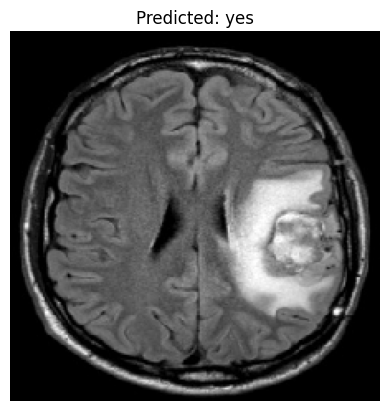

In [39]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

img_path = 'Y20.jpg'  
img = image.load_img(img_path, target_size=(224, 224))  

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  
img_array /= 255.0  

prediction = model.predict(img_array)

class_labels = ['yes','no']
 
predicted_class = class_labels[np.argmax(prediction)]

plt.imshow(img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()


In [40]:
prediction

array([[0.5017192]], dtype=float32)

<Sequential name=sequential_1, built=True>